In [8]:

import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') 

from utils import load_and_preprocess

In [9]:
X_train, X_test, y_train, y_test = load_and_preprocess('../data/processed_data.csv')

In [10]:
# Convert to numpy for scikit-learn convenience
X = np.vstack([X_train, X_test])
y = np.concatenate([y_train, y_test])

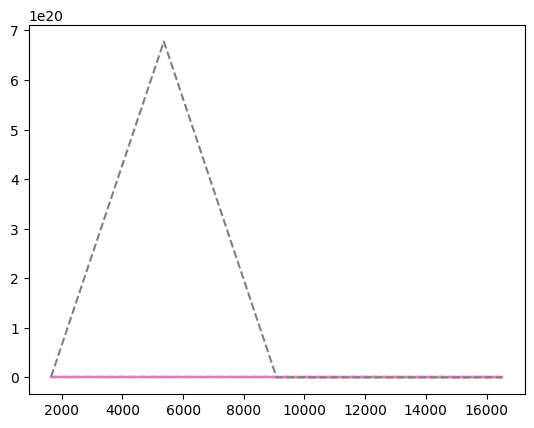

In [11]:
# Plot learning curves for polynomial degrees
for degree in [1, 2, 3, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1)
    train_err = -train_scores.mean(axis=1)
    val_err = -val_scores.mean(axis=1)
    plt.plot(train_sizes, train_err, label=f'train deg={degree}')
    plt.plot(train_sizes, val_err, '--', label=f'val deg={degree}')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20280\3363848220.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


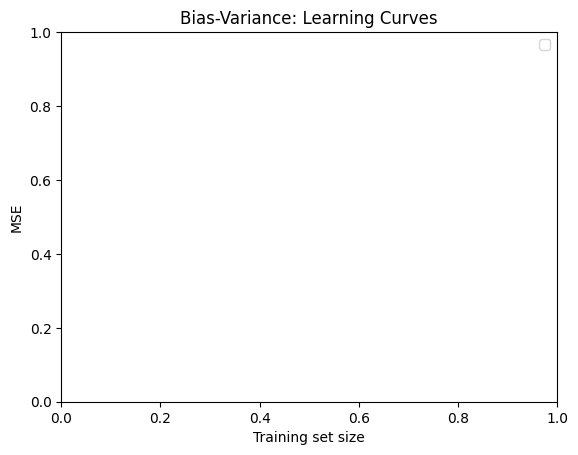

In [13]:
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend()
plt.title('Bias-Variance: Learning Curves')
plt.show()